In [7]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

outdir = 'outdir_taylorF2_injection'
label = 'taylorF2_injection'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.
np.random.seed(150914)


In [17]:
mass_1 = 36.0
mass_2 = 29.0
chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
tot_m = chirp_mass*(1+mass_ratio)**(6/5)/mass_ratio**(3/5)
print(chirp_mass,mass_ratio)
print(ff)
print(tot_m)

28.09555579546043 0.8055555555555556
67.6310005682923
64.99999999999999


In [10]:
chirp_mass_ = 32.0
mass_ratio_ =  1.0
mass_1_ = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
mass_2_ = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)
print("mass_1 = {}, mass_2 = {}".format(mass_1_, mass_2_))

mass_1 = 36.75834735990512, mass_2 = 36.75834735990512


In [16]:
time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 4.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 512.

In [24]:
# frequency_array, mass_1, mass_2, luminosity_distance, a_1, a_2, theta_jn, phase
injection_parameters = dict(
    mass_1=36., mass_2=29., a_1=0.0, a_2=0.0, luminosity_distance=600., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10., catch_waveform_errors=True)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments)

02:27 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [25]:
minimum_frequency = 12.0
maximum_frequency = 112.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

02:27 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:27 bilby INFO    : Injected signal in H1:
02:27 bilby INFO    :   optimal SNR = 36.57
02:27 bilby INFO    :   matched filter SNR = 37.11+1.13j
02:27 bilby INFO    :   mass_1 = 36.0
02:27 bilby INFO    :   mass_2 = 29.0
02:27 bilby INFO    :   a_1 = 0.0
02:27 bilby INFO    :   a_2 = 0.0
02:27 bilby INFO    :   luminosity_distance = 600.0
02:27 bilby INFO    :   theta_jn = 0.4
02:27 bilby INFO    :   psi = 2.659
02:27 bilby INFO    :   phase = 1.3
02:27 bilby INFO    :   geocent_time = 1126259642.413
02:27 bilby INFO    :   ra = 1.375
02:27 bilby INFO    :   dec = -1.2108
02:27 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:27 bilby INFO    : Injected signal in L1:
02:27 bilby INFO    :   optimal SNR = 29.61
02:27 bilby INFO    :   matched filter SNR = 30.14-1.30j
02:27 bilby INFO    :   mass_1 = 36.0
02:27 bilby INFO    :   mass_2 = 29.0
02:27 bilby INFO    :   a_1 = 0.0


[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.79936856e-24-1.10750263e-24j, -2.81692486e-24-1.05228445e-24j,
         -2.83339063e-24-9.96832419e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.10376890e-24+2.78993103e-24j, -1.04873688e-24+2.80742815e-24j,
         -9.93471791e-25+2.82383840e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.79936856e-24-1.10750263e-24j, -2.81692486e-24-1.05228445e-24j,
         -2.83339063e-24-9.96832419e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.10376890e-24+2.78993103e-24j, -1.04873688e-24+2.80742815e-24j,
         -9.93471791e-25+2.82383840e-24j])}]

02:27 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:27 bilby INFO    : Injected signal in H1:
02:27 bilby INFO    :   optimal SNR = 36.57
02:27 bilby INFO    :   matched filter SNR = 73.68+1.13j
02:27 bilby INFO    :   mass_1 = 36.0
02:27 bilby INFO    :   mass_2 = 29.0
02:27 bilby INFO    :   a_1 = 0.0
02:27 bilby INFO    :   a_2 = 0.0
02:27 bilby INFO    :   luminosity_distance = 600.0
02:27 bilby INFO    :   theta_jn = 0.4
02:27 bilby INFO    :   psi = 2.659
02:27 bilby INFO    :   phase = 1.3
02:27 bilby INFO    :   geocent_time = 1126259642.413
02:27 bilby INFO    :   ra = 1.375
02:27 bilby INFO    :   dec = -1.2108
02:27 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
02:27 bilby INFO    : Injected signal in L1:
02:27 bilby INFO    :   optimal SNR = 29.61
02:27 bilby INFO    :   matched filter SNR = 59.75-1.30j
02:27 bilby INFO    :   mass_1 = 36.0
02:27 bilby INFO    :   mass_2 = 29.0
02:27 bilby INFO    :   a_1 = 0.0


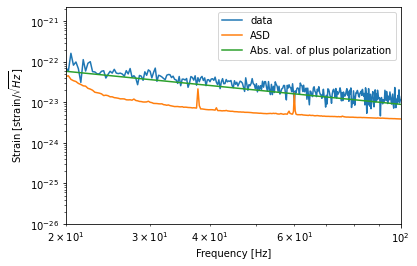

In [26]:
#to plot the frequency domain  
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''

ax.set_xlim(20.,100.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [27]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

47.058686316810245

In [36]:
'''injection_parameters = dict(
    mass_1=36., mass_2=29., a_1=0.0, a_2=0.0, luminosity_distance=600., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)'''

prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.core.prior.Uniform(name='chirp_mass', minimum=27.0,maximum=32.5)
prior['mass_ratio'] = bilby.core.prior.Uniform(name='mass_ratio', minimum=0.5, maximum=1)

for key in ['a_1', 'a_2','psi', 'ra',
            'dec','luminosity_distance', 'theta_jn', 'phase', 'geocent_time']:
    prior[key] = injection_parameters[key]
    
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior)

In [ ]:
result_short = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    nlive=500, dlogz=3.0, npool=8 )

02:37 bilby INFO    : Running for label 'taylorF2_injection', output will be saved to 'outdir_taylorF2_injection'
02:37 bilby INFO    : Using lal version 7.1.4.1
02:37 bilby INFO    : Using lal git version Branch: main;Tag: None;Id: dcd0a82f81f842e9ecfec960b579e67b70378bb9;;Builder: hemantakumar.phurailatpam <hemantaphurailatpam@gmail.com>;Repository status: UNCLEAN: Modified working tree
02:37 bilby INFO    : Using lalsimulation version 3.0.0.1
02:37 bilby INFO    : Using lalsimulation git version Branch: main;Tag: None;Id: dcd0a82f81f842e9ecfec960b579e67b70378bb9;;Builder: hemantakumar.phurailatpam <hemantaphurailatpam@gmail.com>;Repository status: UNCLEAN: Modified working tree
02:37 bilby INFO    : Search parameters:
02:37 bilby INFO    :   chirp_mass = Uniform(minimum=27.0, maximum=32.5, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
02:37 bilby INFO    :   mass_ratio = Uniform(minimum=0.5, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, bou

0it [00:00, ?it/s]

02:37 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 8, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7feba3881450>>, 'dlogz': 3.0, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
02:37 bilby INFO    : Checkpoint every check_point_delta_t = 600s
02:37 bilby INFO    : Using dynesty version 1.0.1
02:37 bilby INFO    : Using the bil